In [1]:
pip install pandas matplotlib seaborn wordcloud

  Using cached matplotlib-3.10.3-cp312-cp312-manylinux_2_17_x86_64.manylinux2014_x86_64.whl.metadata (11 kB)
  Using cached seaborn-0.13.2-py3-none-any.whl.metadata (5.4 kB)
  Using cached contourpy-1.3.2-cp312-cp312-manylinux_2_17_x86_64.manylinux2014_x86_64.whl.metadata (5.5 kB)
  Using cached cycler-0.12.1-py3-none-any.whl.metadata (3.8 kB)
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 106.3/106.3 kB 139.8 kB/s eta 0:00:00a 0:00:01
  Using cached kiwisolver-1.4.8-cp312-cp312-manylinux_2_17_x86_64.manylinux2014_x86_64.whl.metadata (6.2 kB)
  Using cached pillow-11.2.1-cp312-cp312-manylinux_2_28_x86_64.whl.metadata (8.9 kB)
  Using cached pyparsing-3.2.3-py3-none-any.whl.metadata (5.0 kB)
Using cached matplotlib-3.10.3-cp312-cp312-manylinux_2_17_x86_64.manylinux2014_x86_64.whl (8.6 MB)
Using cached seaborn-0.13.2-py3-none-any.whl (294 kB)
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 539.2/539.2 kB 111.9 kB/s eta 0:00:00a 0:00:01
Using cached contourpy-1.3.2-cp312-cp312-manylinux_2_17_x86_6

In [2]:
import pandas as pd

df = pd.read_csv('processed_reviews_with_sentiment_and_themes.csv')

### Sentiment Trend Over Time (Line Plot)

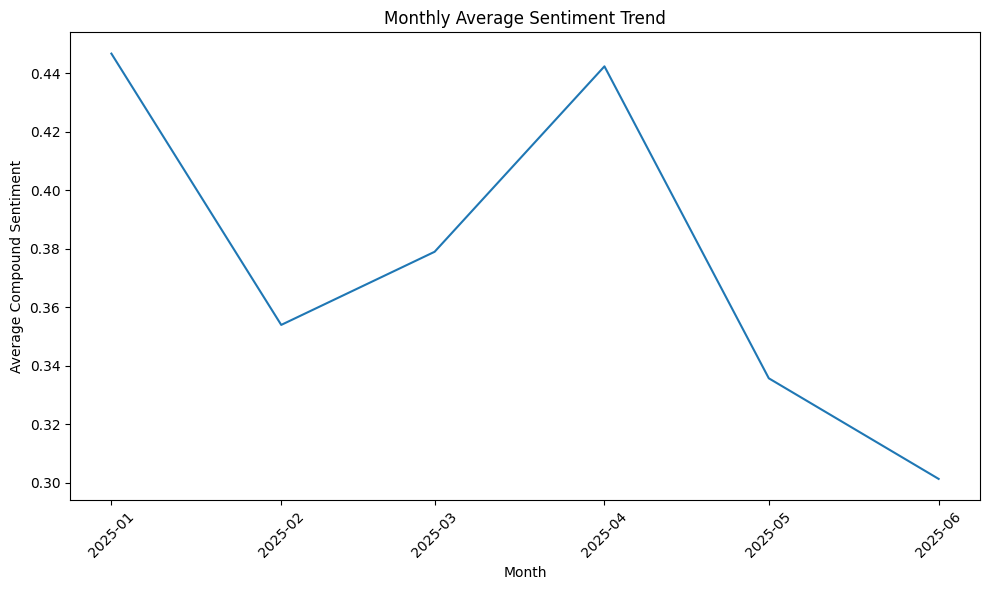

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

df['date'] = pd.to_datetime(df['date'])
df_monthly = df.groupby(df['date'].dt.to_period('M'))['sentiment_compound'].mean().reset_index()
df_monthly['date'] = df_monthly['date'].dt.to_timestamp()

plt.figure(figsize=(10,6))
sns.lineplot(data=df_monthly, x='date', y='sentiment_compound')
plt.title('Monthly Average Sentiment Trend')
plt.xlabel('Month')
plt.ylabel('Average Compound Sentiment')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


### Rating Distribution by Bank (Bar Plot)

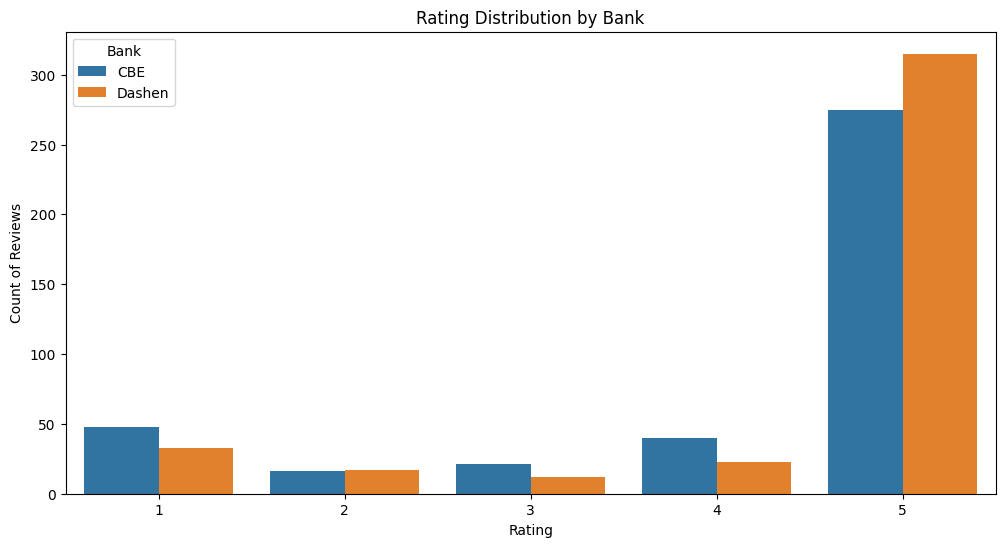

In [6]:
plt.figure(figsize=(12,6))
sns.countplot(data=df, x='rating', hue='bank')
plt.title('Rating Distribution by Bank')
plt.xlabel('Rating')
plt.ylabel('Count of Reviews')
plt.legend(title='Bank')
plt.show()


### Keyword Cloud for Negative Reviews

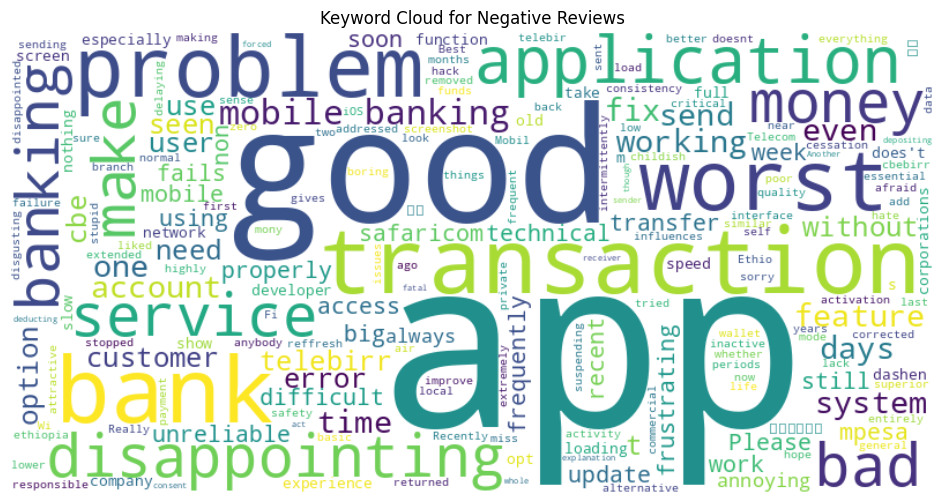

In [8]:
from wordcloud import WordCloud

negative_text = " ".join(df[df['sentiment_label'] == 'negative']['review'].dropna().tolist())

wordcloud = WordCloud(width=800, height=400, background_color='white').generate(negative_text)

plt.figure(figsize=(12,6))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title('Keyword Cloud for Negative Reviews')
plt.show()
